## Using chemical analysis to determine the origin of wines

In [70]:
# Python Project Template
# 1. Prepare Problem
# a) Load libraries
# b) Load dataset
# 2. Summarize Data
# a) Descriptive statistics
# b) Data visualizations
# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms
# 4. Evaluate Algorithms
# a) Split-out validation dataset
# b) Test options and evaluation metric
# c) Spot Check Algorithms
# d) Compare Algorithms
# 5. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles
# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use

In [71]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pickle import dump
from pickle import load
import seaborn as sns
sns.set();

In [72]:
# Load dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
names = ['Class','Alcohol','Malic-Acid','Ash','Alcalinity-of-ash','Magnesium','Total-Phenols','Flavanoids','Nonflavanoid-Phenols','Proanthocyanins','Color-Intensity','Hue','OD280/OD315-of-diluted-wines','Proline']
dataset = pandas.read_csv(url, names=names)

In [73]:
# Summarize the Dataset
# -Dimensions of the dataset.
# -Peek at the data itself.
# -Statistical summary of all attributes.
# -Breakdown of the data by the class variable.

In [74]:
# Dimensions of the dataset.
print(dataset.shape)

(178, 14)


In [75]:
# Peek at the Data
dataset.head(20)

,Class,Alcohol,Malic-Acid,Ash,Alcalinity-of-ash,Magnesium,Total-Phenols,Flavanoids,Nonflavanoid-Phenols,Proanthocyanins,Color-Intensity,Hue,OD280/OD315-of-diluted-wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [76]:
# Statistical summary of all attributes.
dataset.describe()

,Class,Alcohol,Malic-Acid,Ash,Alcalinity-of-ash,Magnesium,Total-Phenols,Flavanoids,Nonflavanoid-Phenols,Proanthocyanins,Color-Intensity,Hue,OD280/OD315-of-diluted-wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [77]:
# Class Distribution
# number of instances (rows) that belong to each class
print(dataset.groupby('Class').size())

Class
1    59
2    71
3    48
dtype: int64


In [78]:
# the classes are not evenly distributed, Class 2 has more items, this may infulence outcomes against the whole dataset

In [79]:
# convert % to Class to string to aid visualization
def ConvertNumberToString(value):
    x= str(value)
    return x

### Data Visualization

In [80]:
# -Univariate plots to better understand each attribute.
# -Multivariate plots to better understand the relationships between attributes.

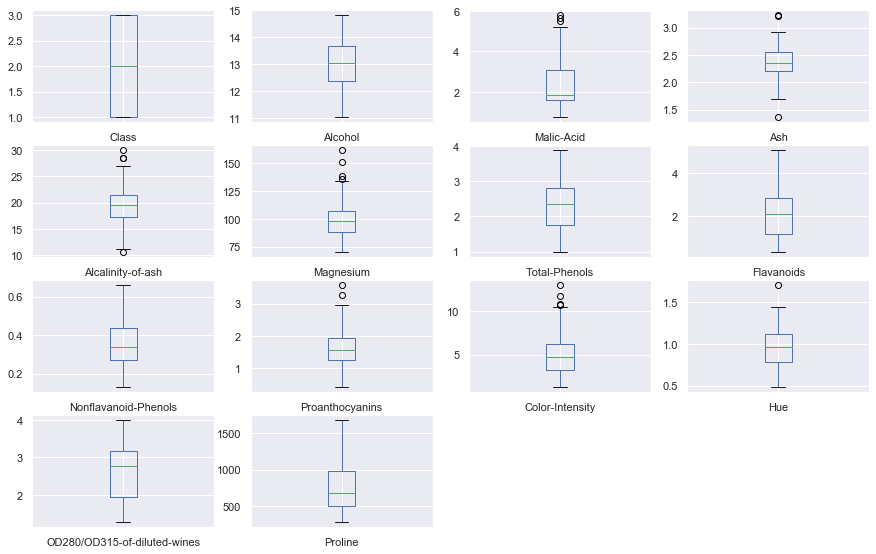

In [81]:
# Univariate [box and whisker plots]
# Given that the input variables are numeric, we can create box and whisker plots of each.
# This gives a clearer idea of the distribution of the input attributes

dataset.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False, figsize=(15,12))
plt.show()

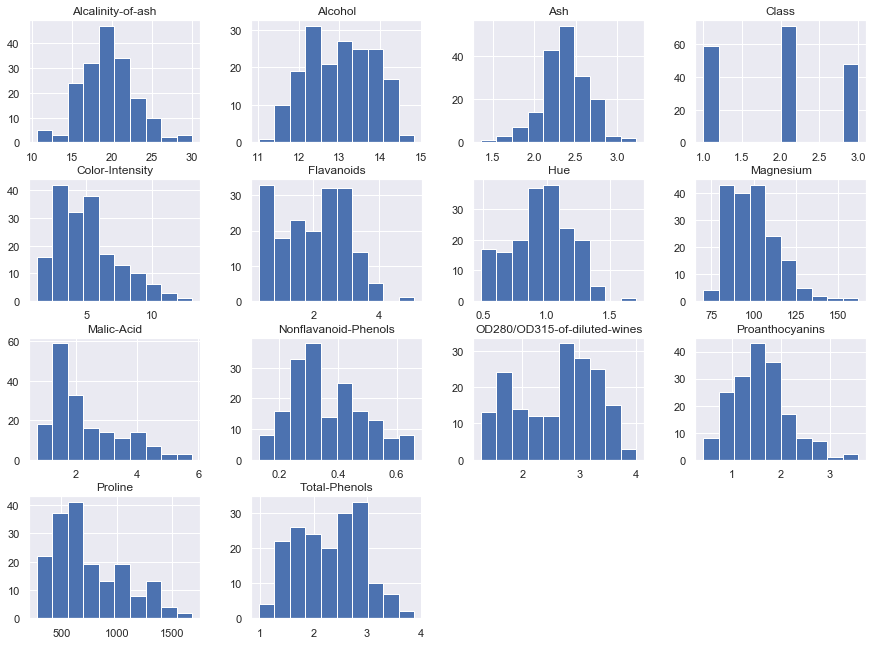

In [82]:
# histograms
dataset.hist(figsize=(15,11))
plt.show()

In [83]:
# 6 input variables look like they have a Gaussian distribution. 
# This is useful to note as we can use algorithms that can exploit this assumption

In [84]:
## Multivariate Plots
#Now we can look at the interactions between the variables.
#First, let’s look at Correlation Matrix of all pairs of attributes. 
#This can be helpful to spot structured relationships between input variables.

,Class,Alcohol,Malic-Acid,Ash,Alcalinity-of-ash,Magnesium,Total-Phenols,Flavanoids,Nonflavanoid-Phenols,Proanthocyanins,Color-Intensity,Hue,OD280/OD315-of-diluted-wines,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic-Acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity-of-ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total-Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid-Phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


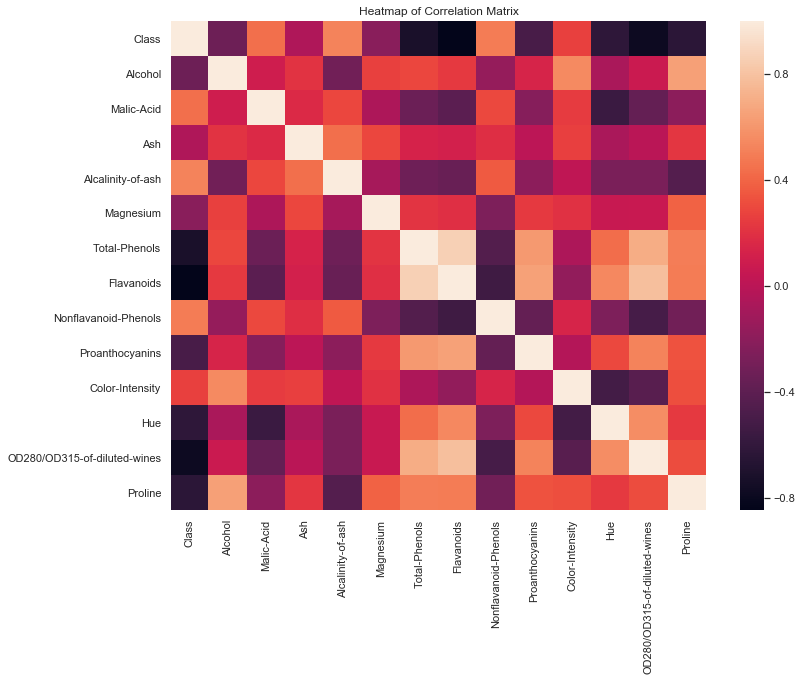

In [85]:
# Correlation matrix. What features correlate the most with class? What other correlations are there?
ax = plt.subplots(figsize=(12,9))
corr = dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,)
plt.title('Heatmap of Correlation Matrix')
corr

The most positively correlated attribute to the "Class" attribute is "Alcalinity-of-ash" with a value of 0.517859
and the most negatively correlated to the "Class" attribute is "Flavanoids" with a value of 0.847498.

## Evaluate Some Algorithms
### Predict wine from constituent quantities

In [86]:
# Split-out validation dataset
array = dataset.values
X = array[:,1:14]
Y = array[:,0]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [87]:
# use 10-fold cross validation to estimate accuracy.
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
# Spot Check Algorithms
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LDA: 0.992857 (0.021429)
RFC: 0.985714 (0.028571)
KNN: 0.726190 (0.076968)
CART: 0.864762 (0.074997)
NB: 0.971429 (0.034993)


In [105]:
# from the results above, LinearDiscriminantAnalysis, RandomForestClassifier and GaussianNB had the best values

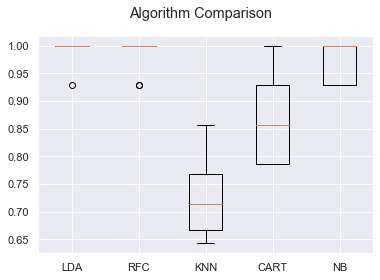

In [106]:
# Compare Algorithm Accuracy
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [109]:
# Make predictions on validation dataset
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions = LDA.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9722222222222222
[[ 7  0  0]
 [ 0 16  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         7
         2.0       1.00      0.94      0.97        17
         3.0       0.92      1.00      0.96        12

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [44]:
# save the model to disk
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb'))

### Conclusion